In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
## Load the dataset
from sklearn.datasets import load_breast_cancer

In [3]:
cancer_dataset=load_breast_cancer()

In [4]:
cancer_dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
print(cancer_dataset.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [6]:
df=pd.DataFrame(cancer_dataset['data'],columns=cancer_dataset['feature_names'])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
## Standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [8]:
scaler.fit(df)

StandardScaler()

In [ ]:
scaled_data = scaler.transform(df)

In [10]:
scaled_data

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]], shape=(569, 30))

In [11]:
##  Applying PCA Algorithms
from sklearn.decomposition import PCA

In [44]:
pca=PCA(n_components=2)

In [45]:
data_pca=pca.fit_transform(scaled_data)

In [46]:
data_pca

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]], shape=(569, 2))

In [47]:
pca.explained_variance_

array([13.30499079,  5.7013746 ])

Text(0, 0.5, 'Second Principal Component')

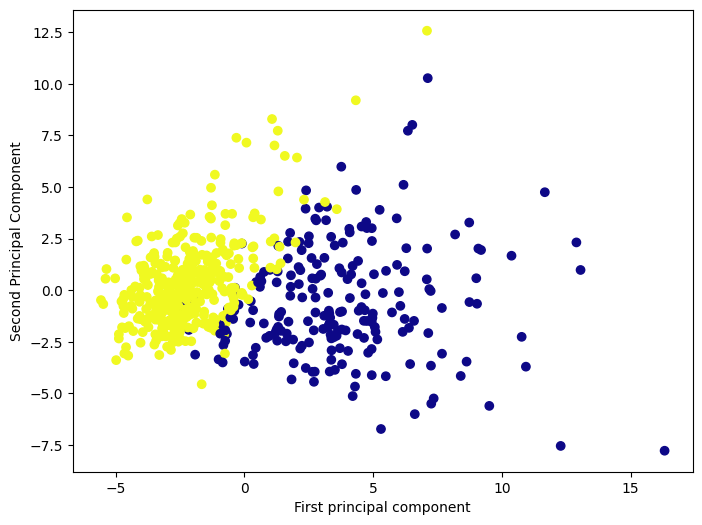

In [48]:
plt.figure(figsize=(8,6))
plt.scatter(data_pca[:,0],data_pca[:,1],c=cancer_dataset['target'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

<Figure size 1000x1000 with 0 Axes>

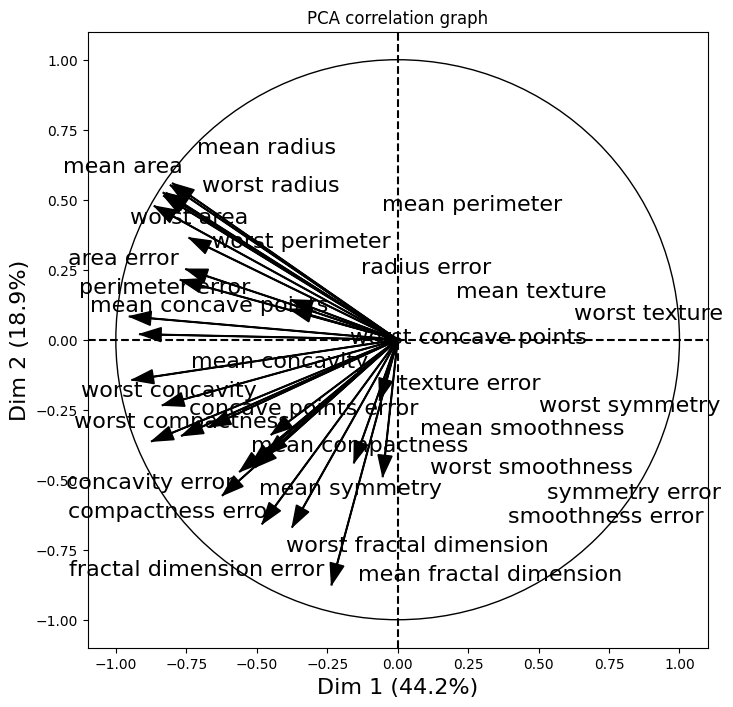

In [21]:
from mlxtend.plotting import plot_pca_correlation_graph
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
figure, correlation_matrix = plot_pca_correlation_graph(scaled_data,
                                                        df.columns,
                                                        dimensions=(1, 2),
                                                        figure_axis_size=8)

plt.title(f"PCA correlation graph")
plt.show()

In [22]:
correlation_matrix

,Dim 1,Dim 2
mean radius,-0.797767,0.557903
mean texture,-0.378013,0.142438
mean perimeter,-0.829236,0.513349
mean area,-0.805393,0.551270
mean smoothness,-0.519653,-0.444002
mean compactness,-0.872050,-0.362361
mean concavity,-0.941713,-0.143534
mean concave points,-0.950654,0.082943
mean symmetry,-0.503535,-0.454107
mean fractal dimension,-0.234565,-0.874523


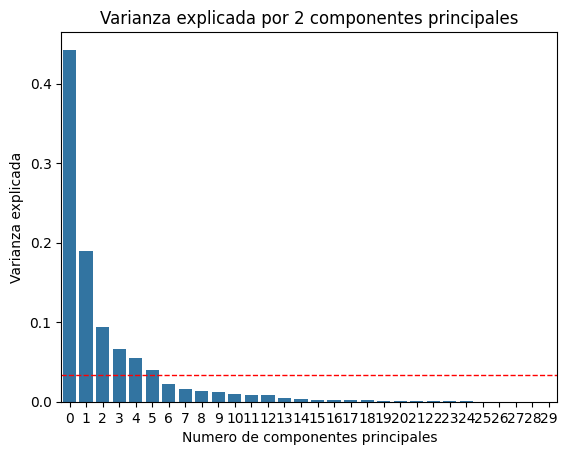

In [49]:
scaler2 = StandardScaler()
df_scaled = scaler2.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns, index=df.index)

pca = PCA()
data_pca = pca.fit_transform(df_scaled)

df_explained_variance = pca.explained_variance_ratio_


sns.barplot(df_explained_variance)
plt.axhline(y=df_explained_variance.mean(), color='r', linestyle='--', linewidth=1)
plt.title('Varianza explicada por 2 componentes principales')
plt.xlabel("Numero de componentes principales")
plt.ylabel("Varianza explicada")
plt.show()

En los datos, 6 componentes principales contienen más informacion de la media explicada por todos los componentes. Entonces, lo óptimo sería quedarnos solamente con las 6 variables principales para el análisis\modelo.

<Figure size 1000x1000 with 0 Axes>

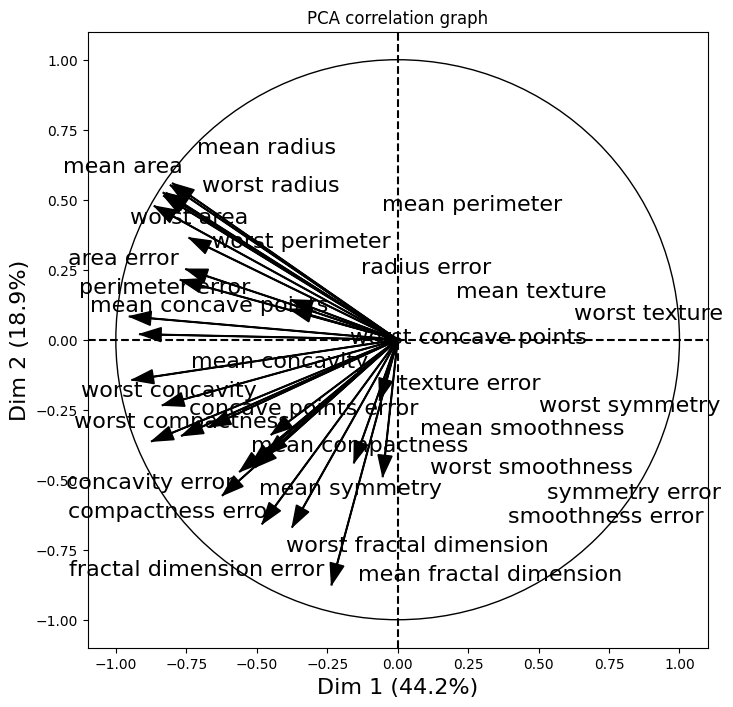

In [37]:
from mlxtend.plotting import plot_pca_correlation_graph
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
figure, correlation_matrix = plot_pca_correlation_graph(scaled_data,
                                                        df.columns,
                                                        dimensions=(1, 2),
                                                        figure_axis_size=8)

plt.title(f"PCA correlation graph")
plt.show()